<a href="https://colab.research.google.com/github/Vinayak-Sharma12/LangGraph/blob/main/2_ChatBot(Annotated%2Badd_messages).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langgraph
!pip install langchain_groq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.2/151.2 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.5/127.5 kB 5.6 MB/s eta 0:00:00


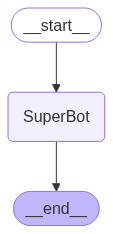

In [13]:
## Display
from IPython.display import Image, display
display (Image(graph_builder.get_graph().draw_mermaid_png()))

## **LLM**

In [15]:
from langchain_groq import ChatGroq
llm=ChatGroq(model='llama-3.1-8b-instant',api_key='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')

## **CREATE STATE**

In [5]:
from typing import Annotated
from langgraph.graph.message import add_messages
from typing_extensions import TypedDict

In [16]:
class State(TypedDict):
   messages:Annotated[list,add_messages]

## **CREATE NODE**

In [17]:
def SuperBot(state:State):
  return {'messages':[llm.invoke(state['messages'])]}

## **STATEGRAPH** -> StateGraph(State) + Add Nodes + Add Edges + Compile

In [18]:
from langgraph.graph import StateGraph,START,END

graph=StateGraph(State)

#Add Node
graph.add_node("SuperBot",SuperBot)

#Add Edge
graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)

#Compile
graph_builder=graph.compile()

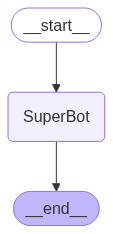

In [19]:
## Display
from IPython.display import Image, display
display (Image(graph_builder.get_graph().draw_mermaid_png()))

## **GRAPH INVOKE**

In [20]:
graph_builder.invoke({"messages":"Hello Viku here"})

{'messages': [HumanMessage(content='Hello Viku here', additional_kwargs={}, response_metadata={}, id='c51f699a-2504-4f27-a39c-67f9e119aa6f'),
  AIMessage(content="Hello Viku, it's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 39, 'total_tokens': 66, 'completion_time': 0.036, 'prompt_time': 0.004296435, 'queue_time': 0.34120135, 'total_time': 0.040296435}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_a4265e44d5', 'finish_reason': 'stop', 'logprobs': None}, id='run--1fda407f-580b-4438-9a1a-1571271f4c92-0', usage_metadata={'input_tokens': 39, 'output_tokens': 27, 'total_tokens': 66})]}